---
layout: default
title: "Neural Networks - Applications"
categories: neuralNetwork
permalink: /ML11/
order: 11
comments: true
---

In [1]:
%pylab --no-import-all inline
import pandas as pd
from plot_ann import ann
import matplotlib_inline.backend_inline
matplotlib_inline.backend_inline.set_matplotlib_formats('svg')
plt.rcParams["mathtext.fontset"] = "cm"

Populating the interactive namespace from numpy and matplotlib


# Neural networks learn their own features
Let's take the network <a href="ML10#simpleann">the previous lesson</a> and focus on the last two layers

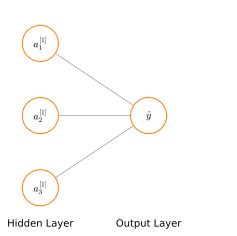

In [2]:
nodelabels=["$a_1^{[1]}$", "$a_2^{[1]}$", "$a_3^{[1]}$", '$\\hat{y}$']
colors=['C1'] * 4
layers = ['Hidden Layer', 'Output Layer']
ax, *_ = ann([3, 1], node_labels=nodelabels, node_colors=colors, layer_labels=layers, radius=2)
ax.set_aspect('equal')

What is left in this neural network is simply logistic regeression, where we use the output unit (or logistic regression unit) to build the hypothesis $\hat{y}$

$$
\hat{y} = \sigma \left(w_{10}^{[2]}a_0^{[1]}+w_{11}^{[2]}a_1^{[1]}+w_{12}^{[2]}a_2^{[1]}+ w_{13}^{[2]}a_3^{[1]} \right)
$$

Where the features fed into logistic regression are the values in $a^{[1]}$. And here resides the fundamental difference between neural networks and logistic regression: the features $A^{[1]}$ they themselves are learned as functions of the input $x$ with some other set of parameters $W^{[1]}$

The neural network, instead of being constrained to feed the features $x$ to logistic regression, learns its own features $A^{[1]}$ to feed into logistic regression. Depending on the parameters $W^{[1]}$, it can learn some complex features and result in a better hypothesis that you could have if you were constrained to use features $x$ or even if you had to manually set some higher order polynomial features combining the features $x$.

Neural networks can have different number and dimension of hidden layers and the way a neural network is connected is called its **architecture**.

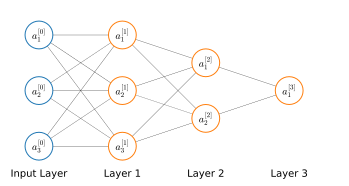

In [3]:
ax, *_ = ann([3, 3, 2, 1], node_labels=True, node_colors=True, layer_labels=True, radius=2, width=2)
ax.set_aspect('equal');

# How neural networks build complex non-linear functions
In this section we will explain how a neural network can build relatively complex non-linear functions.

Let's take a non-linear classification example like that depicted below, where panel A is just a simplified version of panel B.

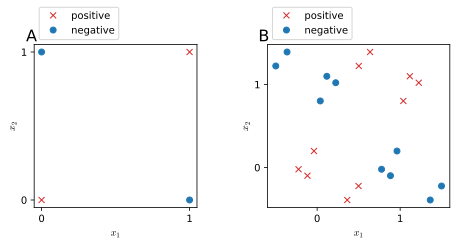

In [4]:
x1x2=np.array([[0, 0], [1, 1], [0, 1], [1, 0]])
fig, axes = plt.subplots(1, 2, figsize=(8, 3))
ax1, ax2 = axes
p = x1x2[:2]
n = x1x2[2:]
ax1.plot(*p.T, ls='none', marker='x', c='C3', label='positive')
ax1.plot(*n.T, ls='none', marker='o', c='C0', label='negative')
pp = np.repeat(p, [5, 5], 0)
nn = np.repeat(n, [5, 5], 0)
jitter = np.random.rand(5, 2)
jitter = np.r_[jitter, 1-jitter] - .5
ax2.plot(*(pp + jitter).T, ls='none', marker='x', c='C3', label='positive')
ax2.plot(*(nn + jitter[::-1]).T, ls='none', marker='o', c='C0', label='negative')

for ax, lbl in zip(axes, ['A', 'B']):
    ax.text(-0.05, 1, lbl, transform=ax.transAxes,
      fontsize=16, va='bottom')
    ax.set_xlabel('$x_1$')
    ax.set_ylabel('$x_2$')
    ax.set_aspect(1)
    ax.legend(bbox_to_anchor=(0, 1), loc='lower left')
    ax.set_xticks([0, 1])
    ax.set_yticks([0, 1])

This is a non-linear classification example modeled by the logical XNOR function

$$
\begin{align}
&x_1 \; \text{XNOR} \; x_2 \\
&\text{NOT} \; (x_1 \; \text{XOR} \; x_2)
\end{align}
$$


## Logical AND function
Let's look at a neural network that can calculate the logical $\text{AND}$ function.

$$
\begin{align}
&x_1,x_2\in \lbrace 0,1 \rbrace\\
&y= x_1 \wedge x_2\\
&W^{[1]} = 
\begin{bmatrix}-30\\20\\20\end{bmatrix}
\end{align}
$$

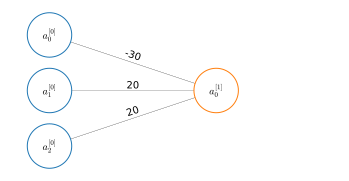

In [5]:
elabels = [-30, 20, 20]
ax, *_ = ann([3, 1], node_colors=True, node_labels=True, edge_labels=elabels, height=.5, radius=2, edge_label_spacing=0, bias=True)
ax.set_aspect('equal')

So that 

$$
\begin{equation}
\hat{y} = \sigma(-30+20x_1+20x_2)
\end{equation}
\label{eq:h} \tag{1}
$$

Since the sigmoid activation function $\sigma(z)$ is

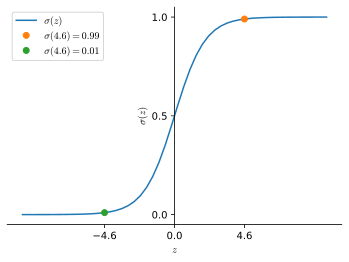

In [6]:
fig, ax = plt.subplots()
z = np.linspace(-10,10)
sigmoid = lambda z: 1/(1+np.e**-z)
ax.plot(z, sigmoid(z), label='$\sigma(z)$')
ax.plot(4.6, sigmoid(4.6), ls='none', marker='o', label=f"$\\sigma(4.6)={sigmoid(4.6):.2f}$")
ax.plot(-4.6, sigmoid(-4.6), ls='none', marker='o', label=f"$\\sigma(4.6)={sigmoid(-4.6):.2f}$")
ax.legend()
ax.set_xlabel('$z$')
ax.set_ylabel('$\\sigma(z)$')
ax.set_yticks([0, .5, 1])
ax.set_xticks([-4.6, 0, 4.6])
ax.spines['left'].set_position('center')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

The the output of $\eqref{eq:h}$ is

In [7]:
x1x2=[[0, 0], [0, 1], [1, 0], [1, 1]]
df = pd.DataFrame(x1x2, columns=['$x_1$', '$x_2$'])
h = lambda s: -30 + 20*s[0] + 20*s[1]
f = lambda z: f'$\\sigma({z}) \\approx {sigmoid(z):.0f}$' 
df["$\\hat{y}$"] = df.apply(h, 1).apply(f)
df.style.set_properties(**{'text-align': 'left'}).hide_index()

$x_1$,$x_2$,$\hat{y}$
0,0,$\sigma(-30) \approx 0$
0,1,$\sigma(-10) \approx 0$
1,0,$\sigma(-10) \approx 0$
1,1,$\sigma(10) \approx 1$


Which is exactly the $x_1 \wedge x_2$.

## Logical OR function
The following network and table show instead $x_1 \vee x_2$

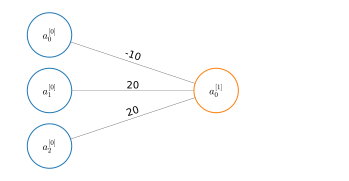

In [8]:
elabels = [-10, 20, 20]
ax, *_ = ann([3, 1], node_colors=True, node_labels=True, radius=2, bias=True,
                edge_labels=elabels, width=2, edge_label_spacing=0)
ax.set_aspect('equal')

$$\hat{y} = \sigma(-10+20x_1+20x_2)$$

In [9]:
x1x2=[[0, 0], [0, 1], [1, 0], [1, 1]]
df = pd.DataFrame(x1x2, columns=['$x_1$', '$x_2$'])
h = lambda s: -10 + 20*s[0] + 20*s[1]
f = lambda z: f'$\\sigma({z}) \\approx {sigmoid(z):.0f}$' 
df["$\\hat{y}$"] = df.apply(h, 1).apply(f)
df.style.set_properties(**{'text-align': 'left'}).hide_index()

$x_1$,$x_2$,$\hat{y}$
0,0,$\sigma(-10) \approx 0$
0,1,$\sigma(10) \approx 1$
1,0,$\sigma(10) \approx 1$
1,1,$\sigma(30) \approx 1$


## Logical NOT function

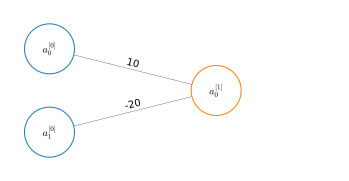

In [10]:
elabels = [10, -20]
ax, *_ = ann([2, 1], node_colors=True, node_labels=True, radius=2, bias=True,
                edge_labels=elabels, width=2, edge_label_spacing=0)
ax.set_aspect('equal')

In [11]:
x1=[0, 1]
df = pd.DataFrame(x1, columns=['$x_1$'])
h = lambda s: 10 -20*s
f = lambda z: f"$\\sigma({z[0]}) \\approx {sigmoid(z)[0]:.0f}$"
df["$\\hat{y}$"] = df.apply(h, 1).apply(f, 1)
df.style.set_properties(**{'text-align': 'left'}).hide_index()

$x_1$,$\hat{y}$
0,$\sigma(10) \approx 1$
1,$\sigma(-10) \approx 0$


## Logical NOT-1 AND NOT-2 function

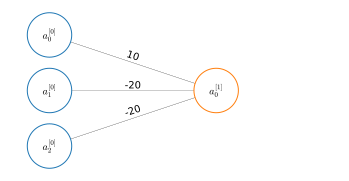

In [12]:
elabels = [10, -20, -20]
ax, *_ = ann([3, 1], node_colors=True, node_labels=True, radius=2, bias=True,
                edge_labels=elabels, width=2, edge_label_spacing=0)
ax.set_aspect('equal')

In [13]:
x1x2=[[0, 0], [0, 1], [1, 0], [1, 1]]
df = pd.DataFrame(x1x2, columns=['$x_1$', '$x_2$'])
h = lambda s: 10 + -20*s[0] + -20*s[1]
f = lambda z: f'$\\sigma({z}) \\approx {sigmoid(z):.0f}$' 
df["$\\hat{y}$"] = df.apply(h, 1).apply(f)
df.style.set_properties(**{'text-align': 'left'}).hide_index()

$x_1$,$x_2$,$\hat{y}$
0,0,$\sigma(10) \approx 1$
0,1,$\sigma(-10) \approx 0$
1,0,$\sigma(-10) \approx 0$
1,1,$\sigma(-30) \approx 0$


## Logical XNOR function

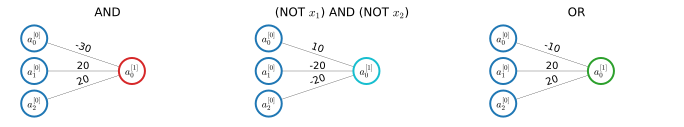

In [14]:
fig, axes = plt.subplots(1, 3, figsize=(12, 4))
ax1, ax2, ax3 = axes

base = ['C0']*3
# AND
ax1.set_title('AND')
ann([3, 1], node_colors=base+['C3'], node_labels=True, radius=2, ax=ax1, node_lw=2, bias=True,
                edge_labels=[-30, 20, 20], width=2, edge_label_spacing=0)
ax.set_aspect('equal')

# NOT1 AND NOT2
ax2.set_title('(NOT $x_1$) AND (NOT $x_2$)')
ann([3, 1], node_colors=base+['C9'], node_labels=True, radius=2, ax=ax2, node_lw=2, bias=True,
                edge_labels=[10, -20, -20], width=2, edge_label_spacing=0)

# OR
ax3.set_title('OR')
ann([3, 1], node_colors=base+['C2'], node_labels=True, radius=2, ax=ax3, node_lw=2, bias=True,
                edge_labels=[-10, 20, 20], width=2, edge_label_spacing=0)

for ax in axes:
    ax.set_aspect('equal')

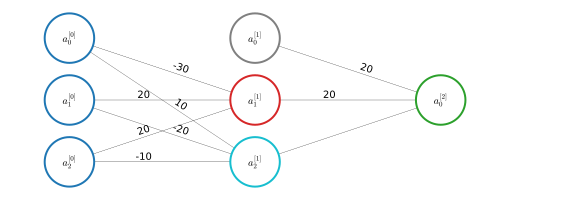

In [15]:
fig, ax = plt.subplots(figsize=(10, 5))
colors=['C0'] * 3 + ['C3', 'C9', 'C2']
nodelabels=["+1", "$x_1$", "$x_2$", "$a_1^{(2)}$", "$a_2^{(2)}$", "$a_1^{(3)}$"]
theta = [-30, 10, 20, -20, 20, -10, 20, 20, '', -10]
ax, *_ = ann([3, 3, 1], node_colors=base+['grey', 'C3', 'C9', 'C2'], node_labels=True, radius=2, node_lw=2, bias=True, 
    edge_labels=theta, width=3, edge_label_spacing=1, ax=ax)

ax.set_aspect('equal');

In [16]:
x1x2=[[0, 0], [0, 1], [1, 0], [1, 1]]
df = pd.DataFrame(x1x2, columns=['$x_1$', '$x_2$'])
a12 = lambda s: -30 + 20*s[0] + 20*s[1]
a22 = lambda s: 10 + -20*s[0] + -20*s[1]
f = lambda z: np.round(sigmoid(z)).astype(int)
df["$a_1^{[1]}$"] = df.apply(a12, 1).apply(f)
df["$a_2^{[1]}$"] = df.apply(a22, 1).apply(f)
a13 = lambda s: -10 + 20*s[2] + 20*s[3]
df["$\hat{y}$"] = df.apply(a13, 1).apply(f)
df.style.set_properties(**{'text-align': 'left'}).hide_index()

$x_1$,$x_2$,$a_1^{[1]}$,$a_2^{[1]}$,$\hat{y}$
0,0,0,1,1
0,1,0,0,0
1,0,0,0,0
1,1,1,0,1


# Neural network multi-class classification
Multiclass classification in neural network is an extension of the on vs all method. Let's say that we want to build an image processing algorithm that can distinguish between four class of vehicles. We will build a neural network with 4 output units, each of which will model one of the output classes $C$

$$
h\Theta(x) = \begin{bmatrix}
P(y_1 \mid x, \Theta) \\
P(y_2 \mid x, \Theta) \\
P(y_3 \mid x, \Theta)\\
P(y_4 \mid x, \Theta)
\end{bmatrix}
$$

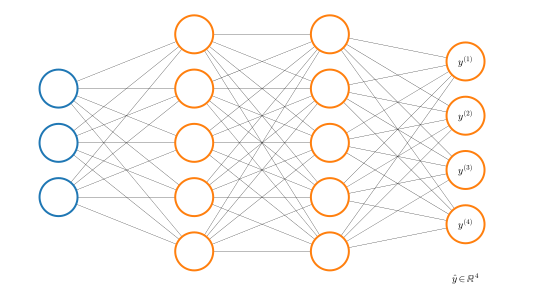

In [17]:
fig, ax = plt.subplots(figsize=(10, 5))
layerlabels=['']*3+['$\\hat{y} \in \mathbb{R}^4$']
nodelabels = ['']*13+['$y^{(1)}$', '$y^{(2)}$', "$y^{(3)}$", '$y^{(4)}$']
ann([3, 5, 5, 4], node_colors=True, node_lw=2, ax=ax, width=2, radius=2,
               layer_labels=layerlabels, node_labels=nodelabels)
ax.set_aspect('equal');

So that $\hat{y}_i$ can be one of the following

$$\hat{y}_i \approx \begin{bmatrix}1\\0\\0\\0\end{bmatrix} \;, \;  \begin{bmatrix}0\\1\\0\\0\end{bmatrix} \;, \;  \begin{bmatrix}0\\0\\1\\0\end{bmatrix}
\;, \;  \begin{bmatrix}0\\0\\0\\1\end{bmatrix}$$
